# Deployment

## Review 

We built up to an agent with memory. 

## Goals

Now, we'll cover how to actually deploy your agent! 

We've cover deployment locally and to LangGraph cloud.

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langgraph-cli langgraph_sdk

## Concepts

There are a few central concepts to understand about LangGraph deployment.

`LangGraph` —
- Python and JavaScript library 
- Allows creation of agent workflows 

`API` —
- Bundles the graph code 
- Provides a task queue for managing asynchronous operations
- Offers persistence for maintaining state across interactions

`Cloud` --
- Hosted service for the LangGraph API
- Allows deployment of graphs from GitHub repositories
- Provides monitoring, tracing, and API documentation for deployed graphs
- Accessible via a unique URL for each deployment

`Studio` --
- Integrated Development Environment (IDE) for LangGraph applications
- Uses the API as its back-end, allowing real-time testing and exploration of graphs
- Can be run locally or with cloud-deployment

`SDK` --
- Python library for programmatically interacting with LangGraph graphs
- Provides a consistent interface for working with graphs, whether served locally or in the cloud
- Allows creation of clients, access to assistants, thread management, and execution of runs

## Testing Locally

We can easily connect with graphs that are served locally in LangGraph Studio.

We do this via the url provided in the lower left corner of the Studio UI.

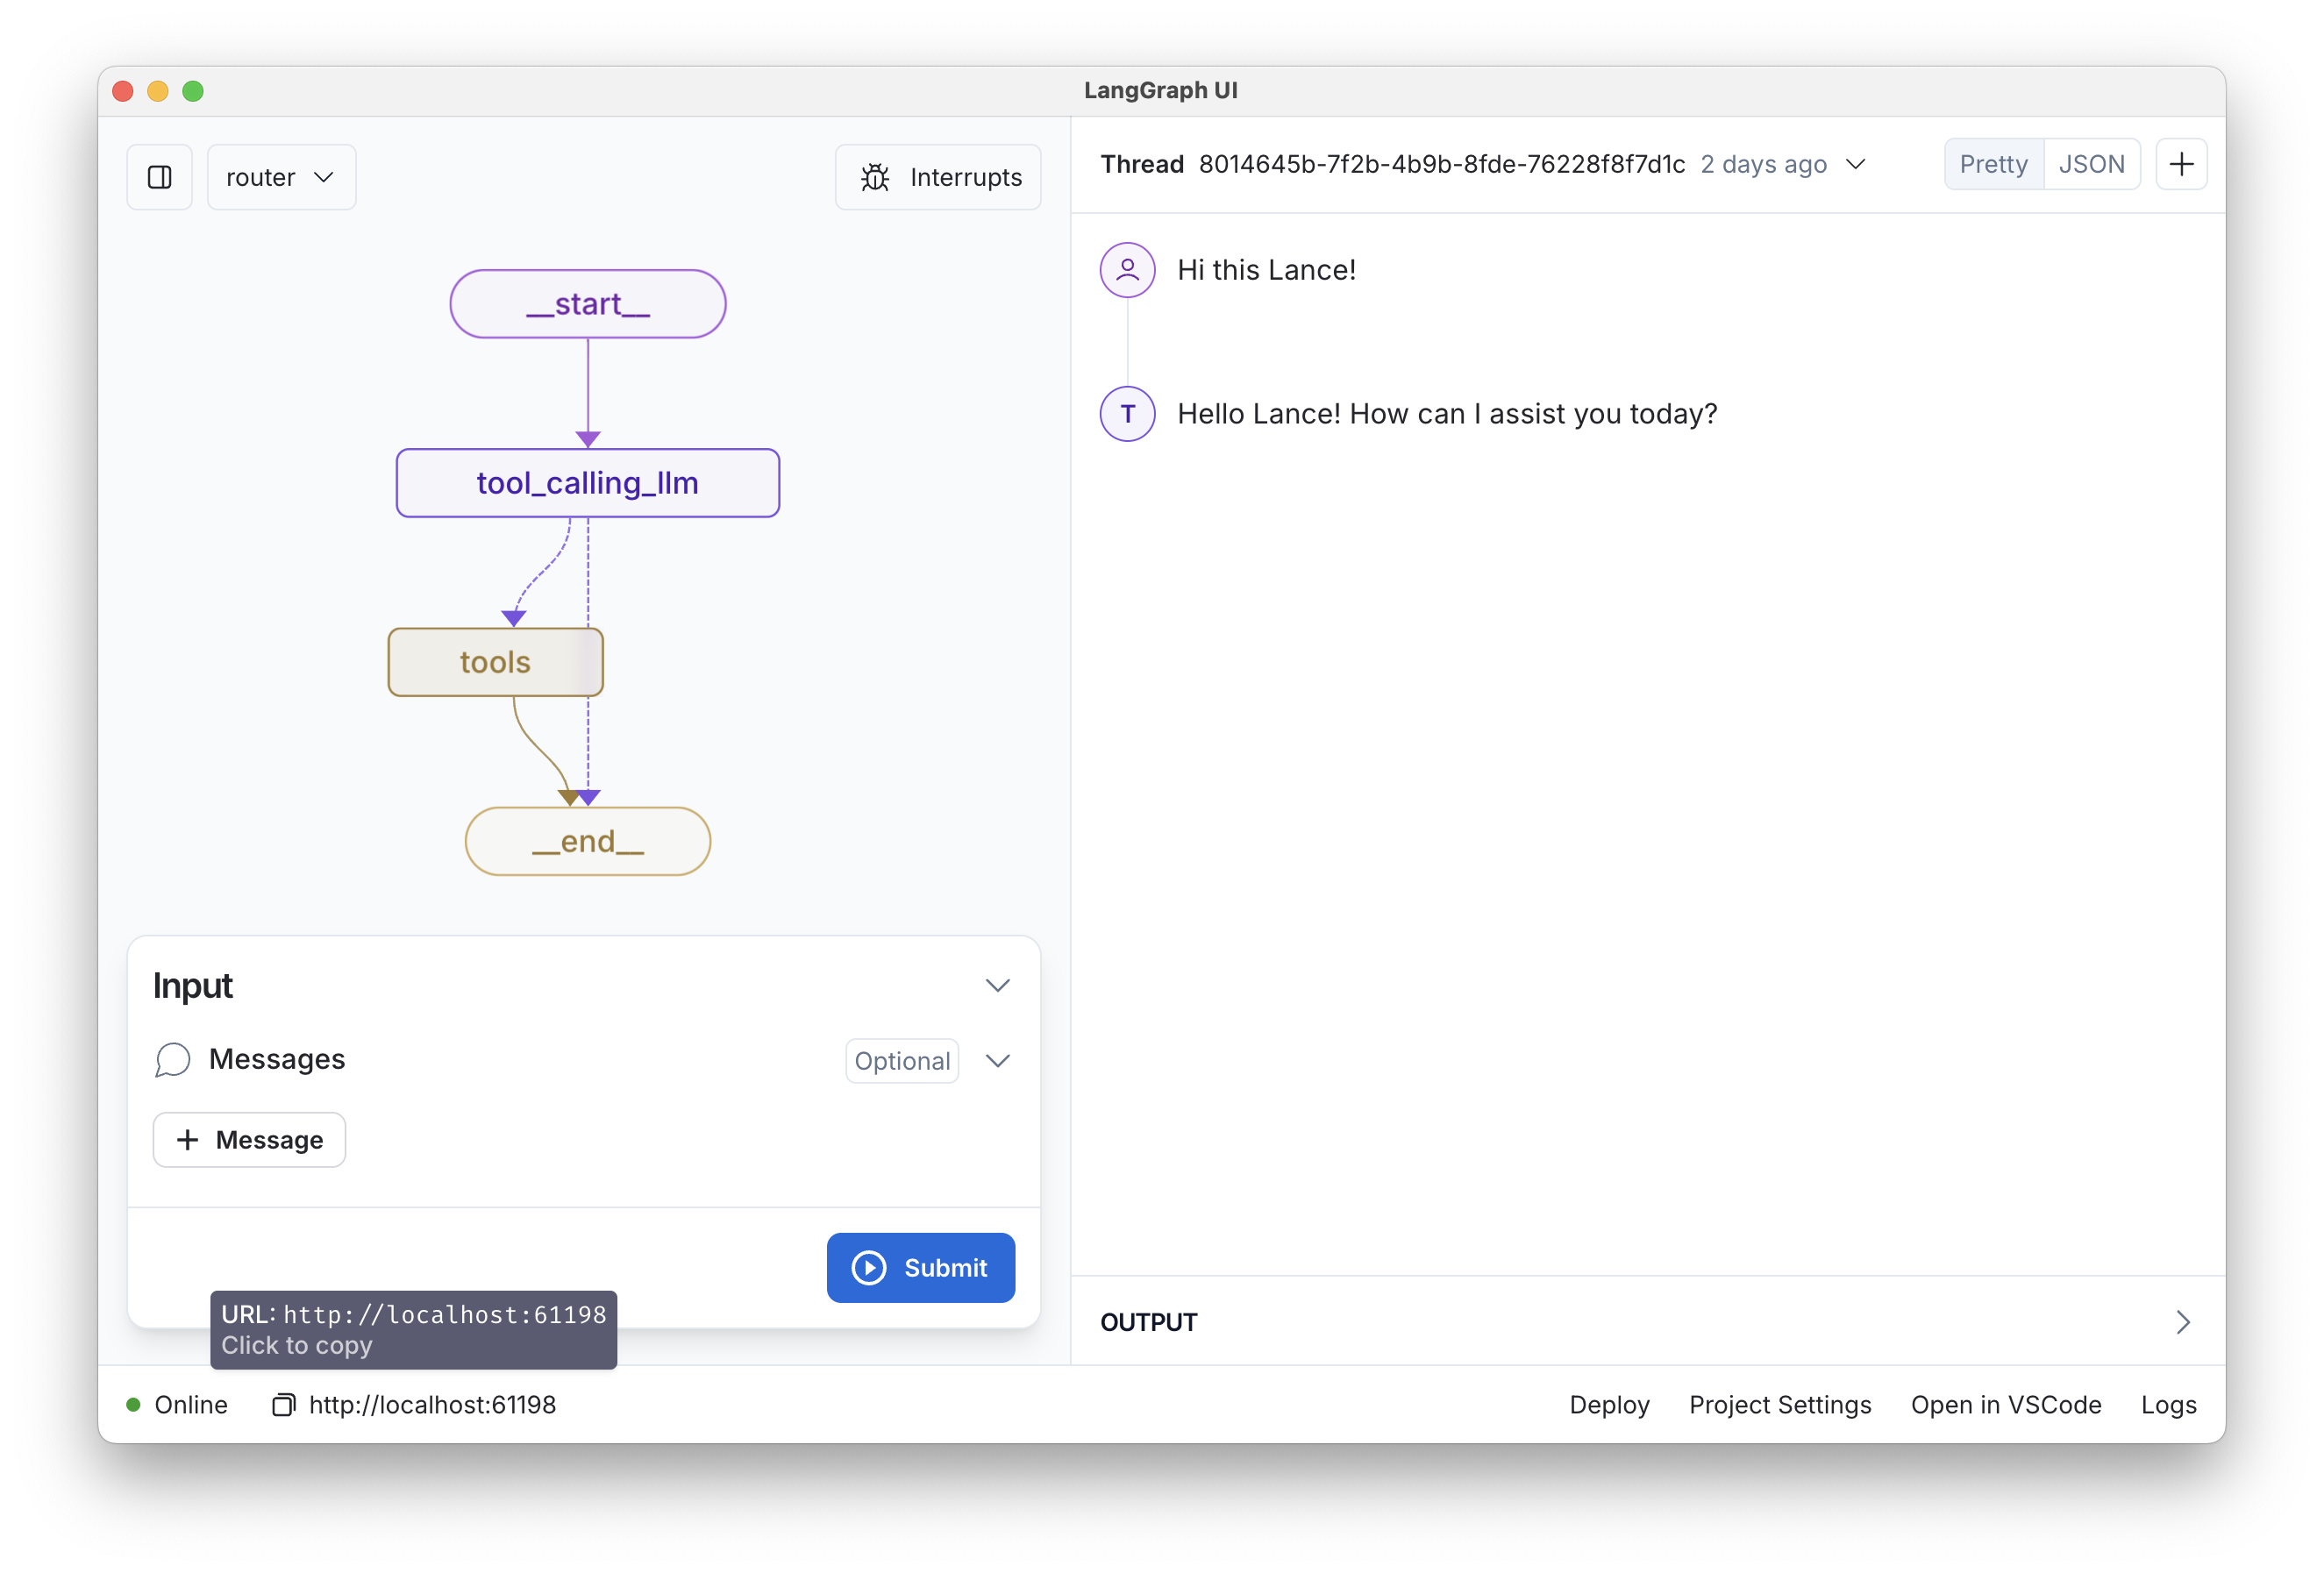

In [2]:
from langgraph_sdk import get_client

In [21]:
# Replace this with the URL of your own deployed graph
URL = "http://localhost:61198"
client = get_client(url=URL)

# Search all hosted graphs
assistants = await client.assistants.search()
assistants

[{'assistant_id': '8a4ac7a4-50eb-5206-98cc-4a72345cb1f7',
  'graph_id': 'chatbot',
  'created_at': '2024-08-23T19:11:27.632720+00:00',
  'updated_at': '2024-08-23T19:11:27.632720+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}},
 {'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca',
  'graph_id': 'agent',
  'created_at': '2024-08-21T20:12:16.736999+00:00',
  'updated_at': '2024-08-21T20:12:16.736999+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}},
 {'assistant_id': '228f9934-0cdd-5383-92c8-ee8422522cc2',
  'graph_id': 'router',
  'created_at': '2024-08-21T18:49:27.365802+00:00',
  'updated_at': '2024-08-21T18:49:27.365802+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}},
 {'assistant_id': '28d99cab-ad6c-5342-aee5-400bd8dc9b8b',
  'graph_id': 'simple_graph',
  'created_at': '2024-08-20T23:40:28.954501+00:00',
  'updated_at': '2024-08-20T23:40:28.954501+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}}]

In [5]:
# Select the agent
agent = assistants[2]

In [8]:
agent

{'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca',
 'graph_id': 'agent',
 'created_at': '2024-08-14T18:04:19.759176+00:00',
 'updated_at': '2024-08-14T18:04:19.759176+00:00',
 'config': {},
 'metadata': {'created_by': 'system'}}

In [6]:
# We create a thread for tracking the state of our run
thread = await client.threads.create()

Now, we can run with our agent.

In [22]:
from langchain_core.messages import HumanMessage

# Input
input = {"messages": [HumanMessage(content="Multiply 3 by 2.")]}

# Stream
async for chunk in client.runs.stream(
        thread['thread_id'],
        agent["assistant_id"],
        input=input,
        stream_mode="values",
    ):
    if chunk.data and chunk.event != "metadata":
        print(chunk.data['messages'][-1]

Multiply 3 by 2.
{'content': 'Multiply 3 by 2.', 'additional_kwargs': {'example': False, 'additional_kwargs': {}, 'response_metadata': {}}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': 'd1c5fb8c-ebdf-415f-85d8-e0dd6b0215e9', 'example': False}

{'content': '', 'additional_kwargs': {'tool_calls': [{'index': 0, 'id': 'call_IW4VXeJGifkpPBYSA3TTZisH', 'function': {'arguments': '{"a":3,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, 'response_metadata': {'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_3aa7262c27'}, 'type': 'ai', 'name': None, 'id': 'run-b4f490db-20b6-49d6-9591-a68652f792a4', 'example': False, 'tool_calls': [{'name': 'multiply', 'args': {'a': 3, 'b': 2}, 'id': 'call_IW4VXeJGifkpPBYSA3TTZisH', 'type': 'tool_call'}], 'invalid_tool_calls': [], 'usage_metadata': None}
6
{'content': '6', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'tool', 'name': 'multiply', 'id': '203fd14c-3f65-4eaa-a39e-08a7260ee595'

## Testing with Cloud

We can deploy to Cloud via LangSmith, as outlined [here](https://langchain-ai.github.io/langgraph/cloud/quick_start/#deploy-from-github-with-langgraph-cloud).

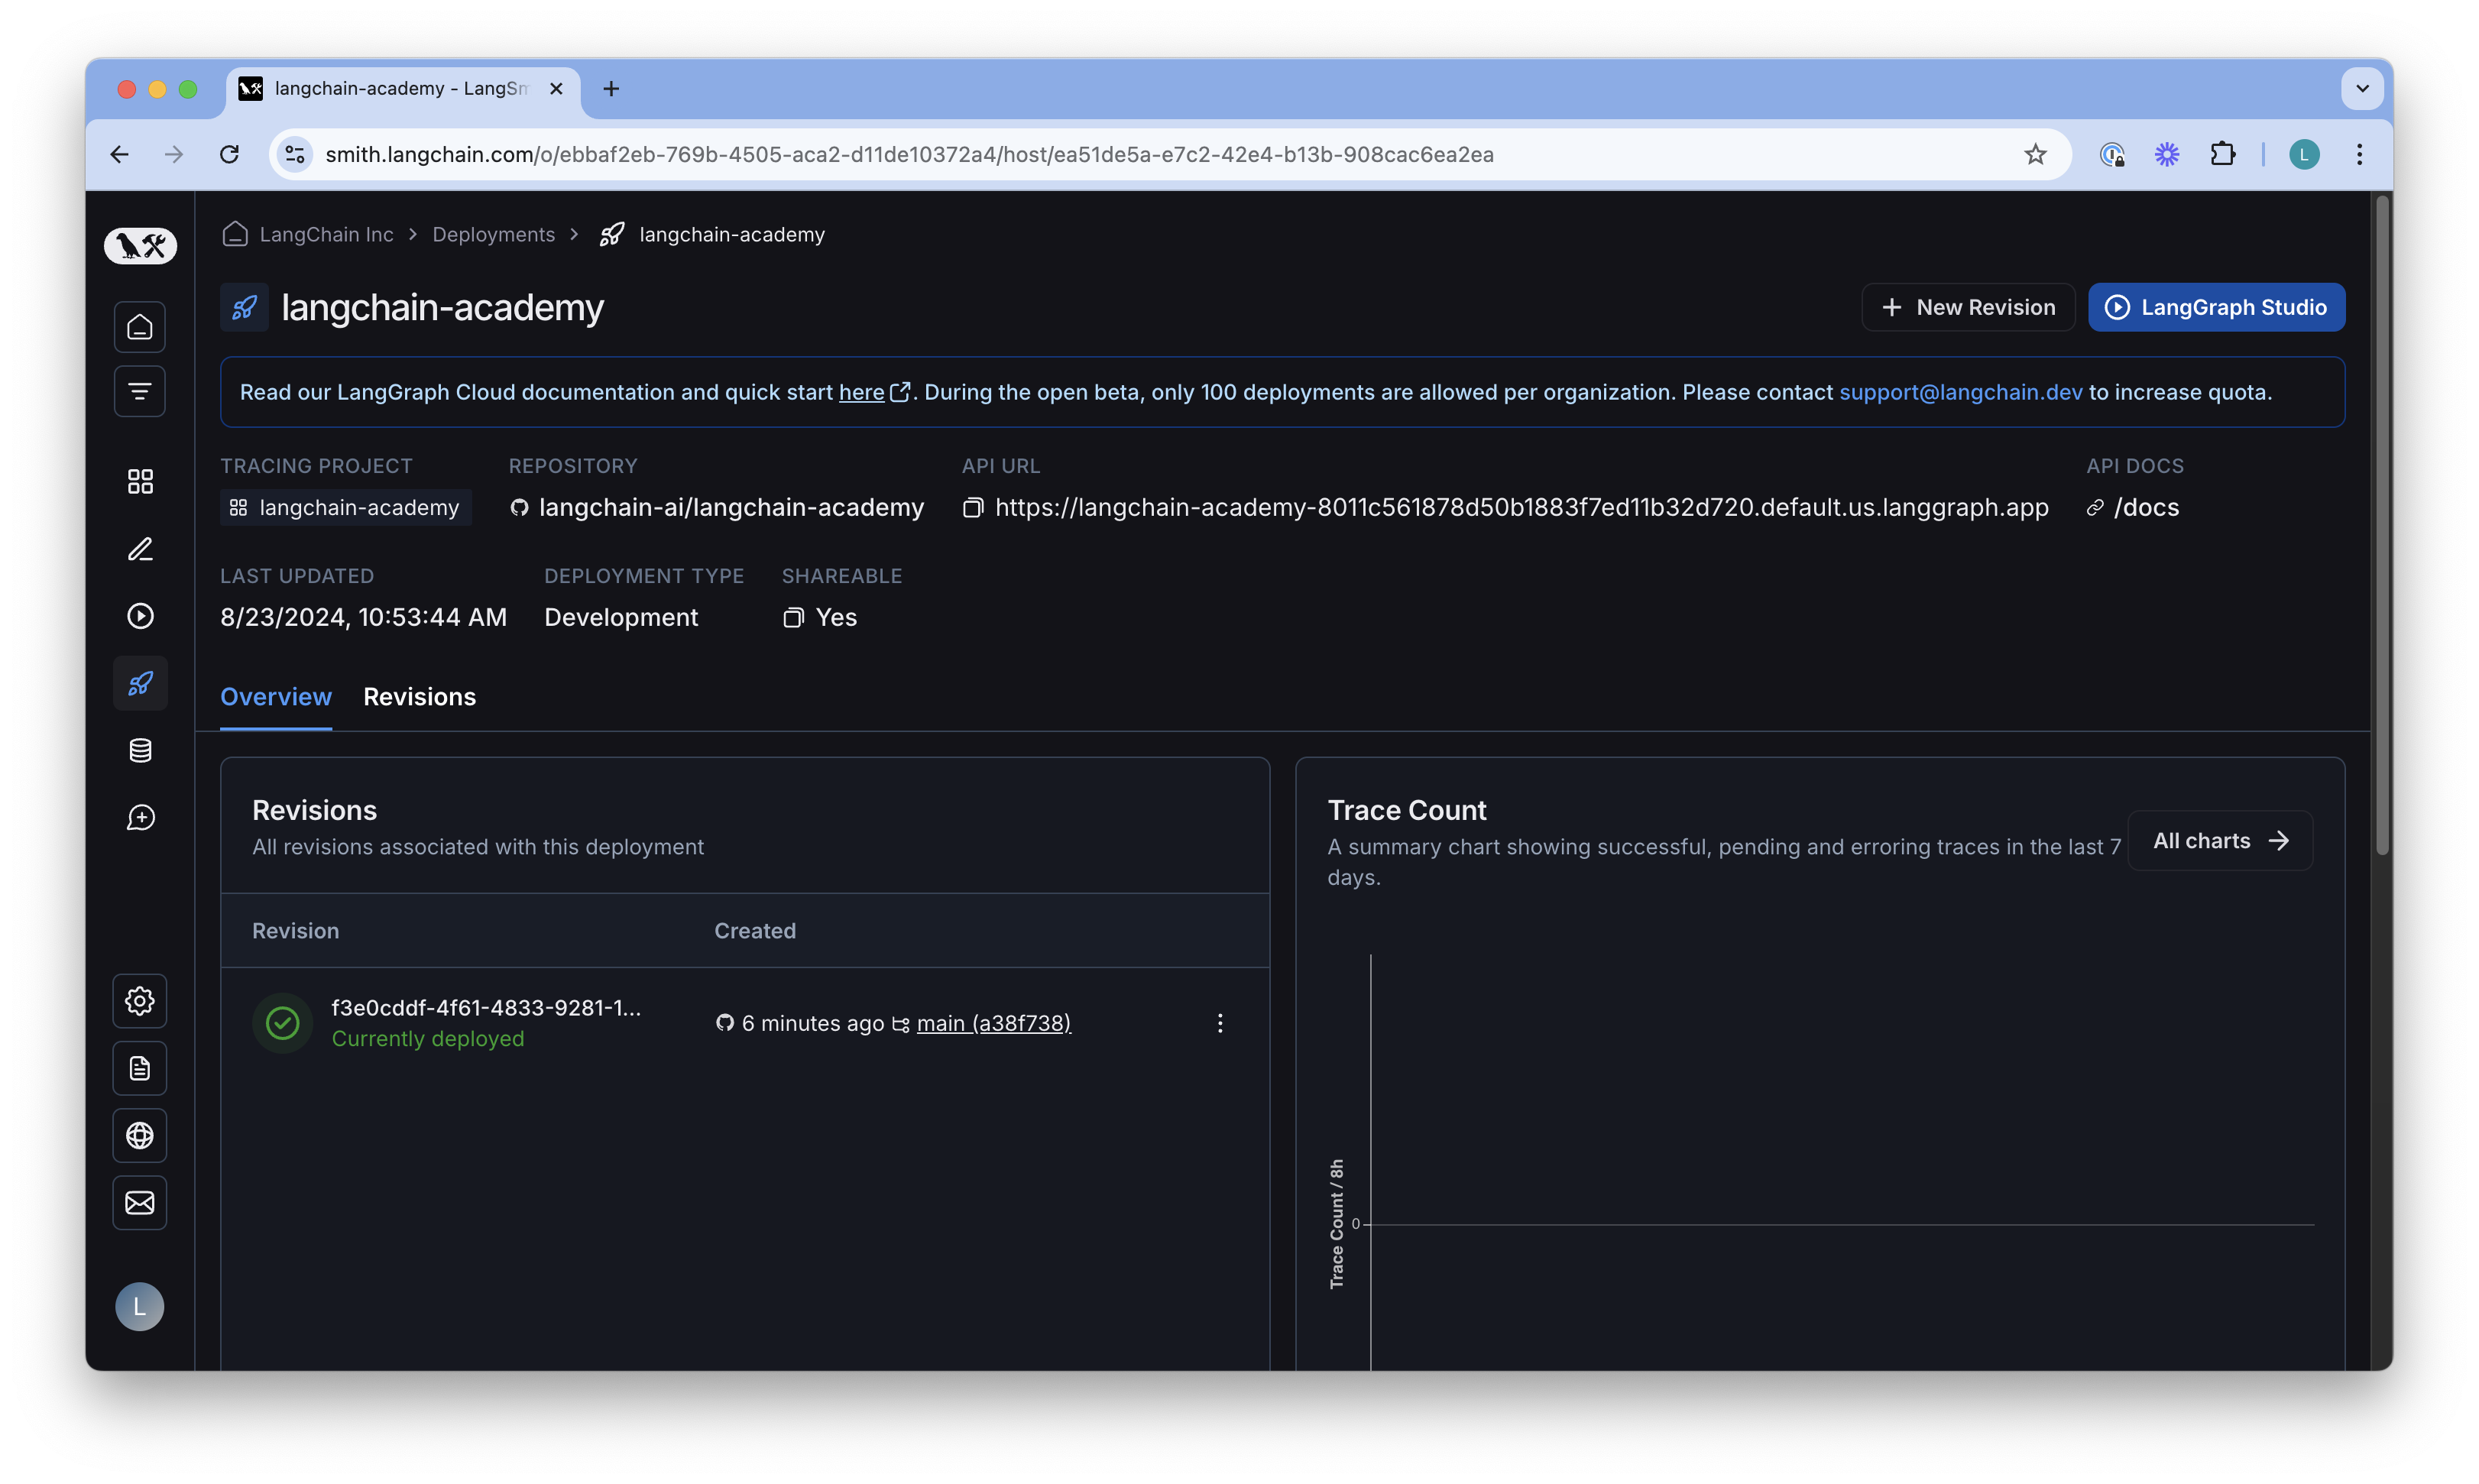

We can then interact with our deployment a few different ways:

* With the [SDK](https://langchain-ai.github.io/langgraph/cloud/quick_start/#use-with-the-sdk), as before.
* With [LangGraph Studio](https://langchain-ai.github.io/langgraph/cloud/quick_start/#interact-with-your-deployment-via-langgraph-studio)

Now, simply ensure that `LANGSMITH_API_KEY` is set.

```
export LANGSMITH_API_KEY=...
```

In [7]:
# Replace this with the URL of your own deployed graph
URL = "https://langchain-academy-8011c561878d50b1883f7ed11b32d720.default.us.langgraph.app"
client = get_client(url=URL)

# Search all hosted graphs
assistants = await client.assistants.search()
assistants

[{'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca',
  'graph_id': 'agent',
  'created_at': '2024-08-23T17:58:02.722920+00:00',
  'updated_at': '2024-08-23T17:58:02.722920+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}},
 {'assistant_id': '228f9934-0cdd-5383-92c8-ee8422522cc2',
  'graph_id': 'router',
  'created_at': '2024-08-23T17:58:02.613198+00:00',
  'updated_at': '2024-08-23T17:58:02.613198+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}},
 {'assistant_id': '28d99cab-ad6c-5342-aee5-400bd8dc9b8b',
  'graph_id': 'simple_graph',
  'created_at': '2024-08-23T17:58:01.823937+00:00',
  'updated_at': '2024-08-23T17:58:01.823937+00:00',
  'config': {},
  'metadata': {'created_by': 'system'}}]

In [15]:
# Select the agent
agent = assistants[0]

In [16]:
agent

{'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca',
 'graph_id': 'agent',
 'created_at': '2024-08-23T17:58:02.722920+00:00',
 'updated_at': '2024-08-23T17:58:02.722920+00:00',
 'config': {},
 'metadata': {'created_by': 'system'}}

In [10]:
# We create a thread for tracking the state of our run
thread = await client.threads.create()

In [18]:
from langchain_core.messages import HumanMessage

# Input
input = {"messages": [HumanMessage(content="Multiply 3 by 2.")]}

# Stream
async for chunk in client.runs.stream(
        thread['thread_id'],
        agent["assistant_id"],
        input=input,
        stream_mode="values",
    ):
    if chunk.data and chunk.event != "metadata":
        print(chunk.data['messages'][-1])

{'content': 'Multiply 3 by 2.', 'additional_kwargs': {'example': False, 'additional_kwargs': {}, 'response_metadata': {}}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': '8609d120-6093-40b1-827d-e9000e256f3e', 'example': False}
{'content': '', 'additional_kwargs': {'tool_calls': [{'index': 0, 'id': 'call_lD708KPOqjZPWPKcuHWwOYsW', 'function': {'arguments': '{"a":3,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, 'response_metadata': {'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_3aa7262c27'}, 'type': 'ai', 'name': None, 'id': 'run-ecdd3924-8349-4c5c-a753-71338397bd21', 'example': False, 'tool_calls': [{'name': 'multiply', 'args': {'a': 3, 'b': 2}, 'id': 'call_lD708KPOqjZPWPKcuHWwOYsW', 'type': 'tool_call'}], 'invalid_tool_calls': [], 'usage_metadata': None}
{'content': '6', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'tool', 'name': 'multiply', 'id': 'eb7c5b45-e6c3-43a2-93ab-c27098243217', 'tool_call_id': 'c